# Appliability of basic machine learning algorithms for breast cancer diagnosis based on geometric characteristics of cell nuclei

## Description of the data set
In this notebook I am going to analyize a data set containing geometric characteristics found in samples of breast mass. The data set also contains a classification of each sample as benign (sample was taken from breast tissue that does not contain) or malignant (sample was taken from breast tissue that contains cancer). 

## Research questions 
The research questions I would like to answer using this data set are:
<ol>
    <li>Using data similar to data in this data set, would it be possible to accurately detect breast cancer with basic machine learning algorithms like the ones introduced in the Python for Data Science course?</li>
    <li>How do these basic algorithms perform in comparison with more advanced machine learning techniques?</li>
    <li>Is it possible to determine which of the features are important to the classification, and which ones have little or no contribution?</li>
</ol>

## Research methods
To answer my first research question, I am going to pick three or four basic machine learning algorithms, train them with a portion of the data in the data set, and use the rest of the data to test their accuracy. I am also going to try different values for input parameters like the maximum node count of the decision tree and see which values result in the best accuracy.

To answer the second research question, I will examine existing notebooks on https://www.kaggle.com in which other people have described their results with the same data set using more advanced techniques like Artificial Neural Networks.

To answer the third research question, I will first examine feature distribution plots and try to predict which features should turn out to be most important to the algorithms and then compare my predictions with feature importance values calculated by the models.

First, I am going to explore the data set and make myself familiar with the data, its shape, the size of the data set and data quality.
Next, I am going to 

## Exploring the data set
The data set was retrieved from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('breast_cancer_classification.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [4]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [5]:
df = df.drop(df.columns[32], axis=1)

In [6]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [7]:
features = df.columns
features


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
features = features.drop(['id', 'diagnosis'])
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

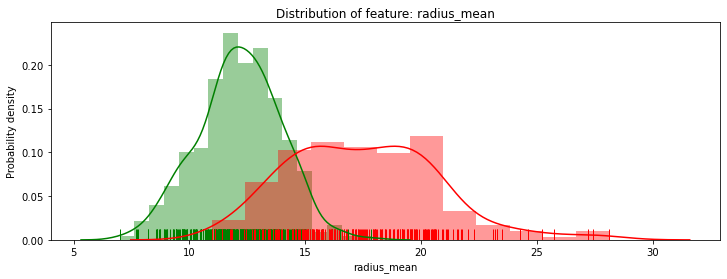

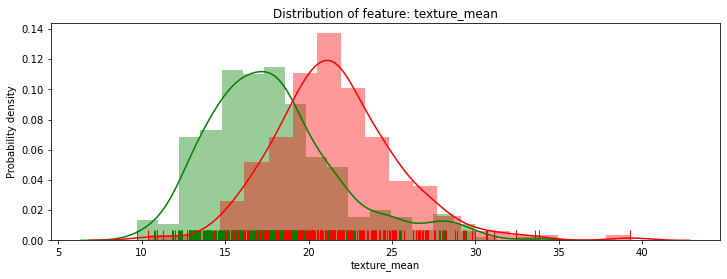

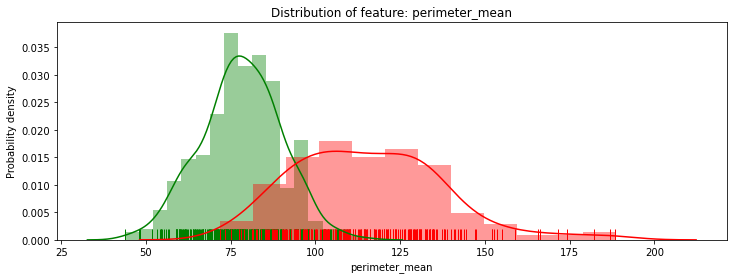

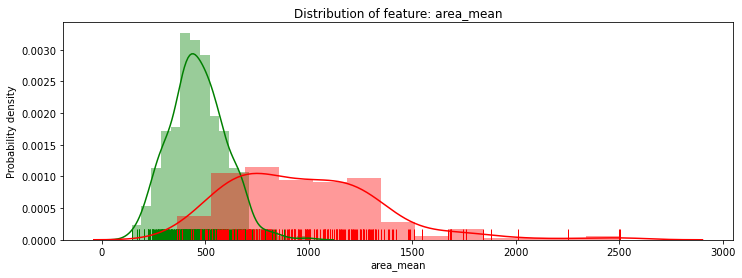

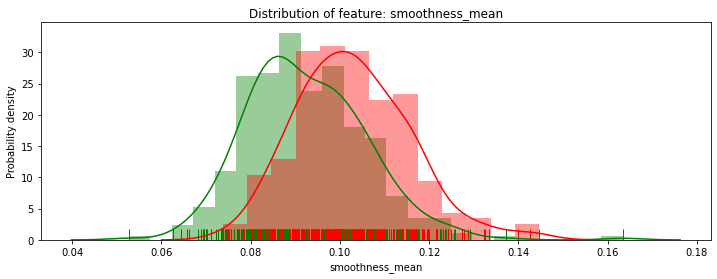

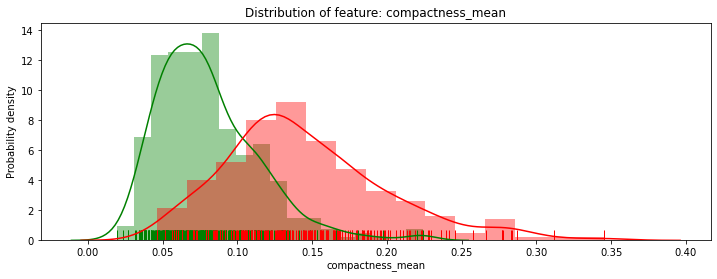

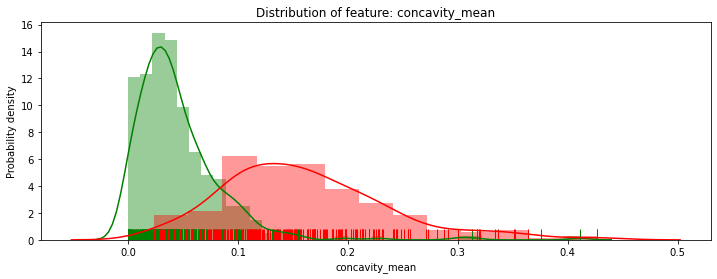

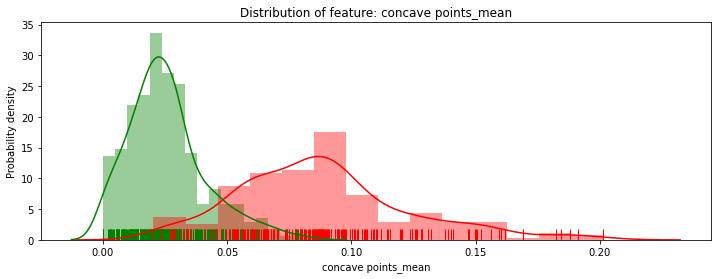

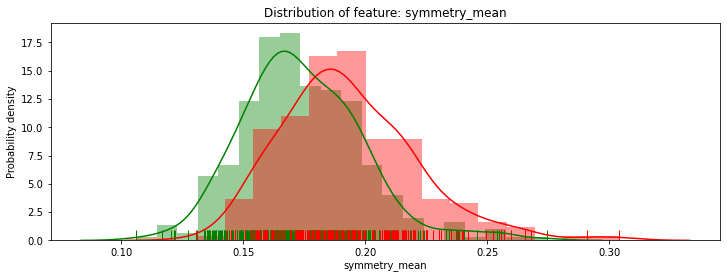

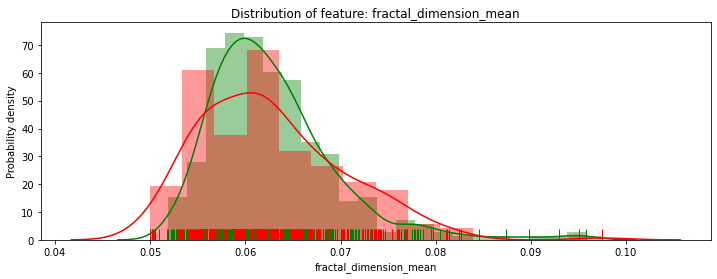

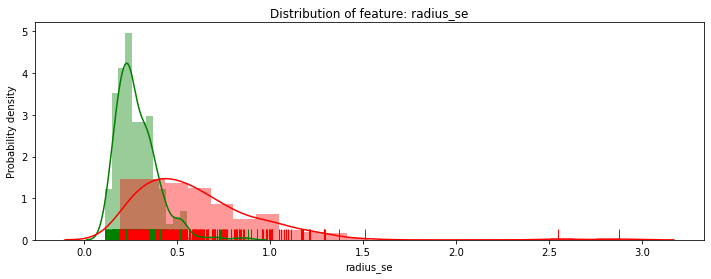

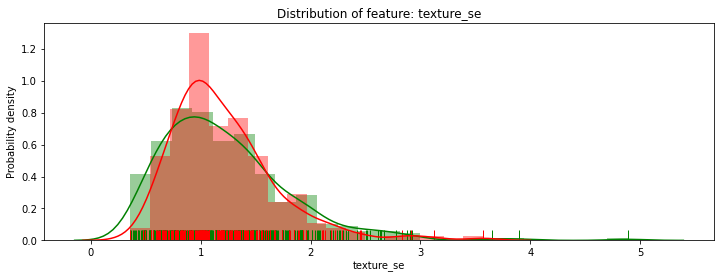

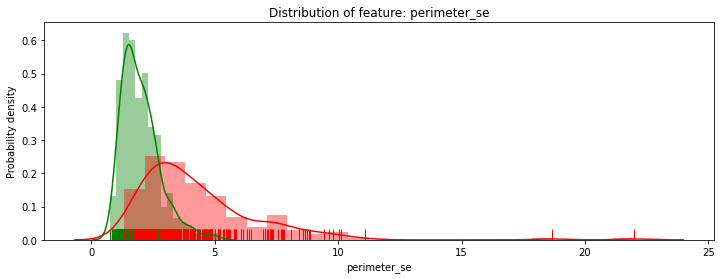

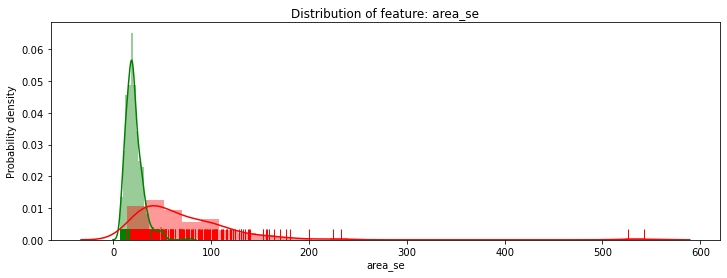

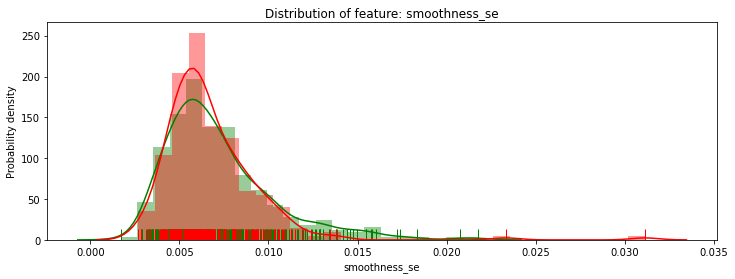

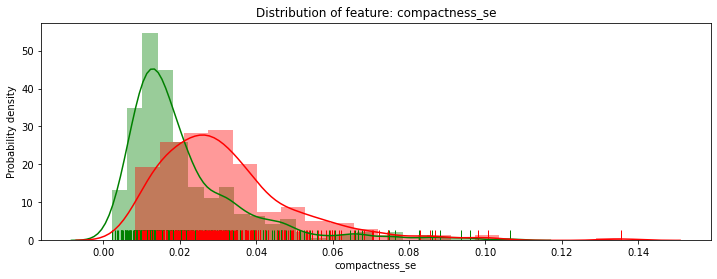

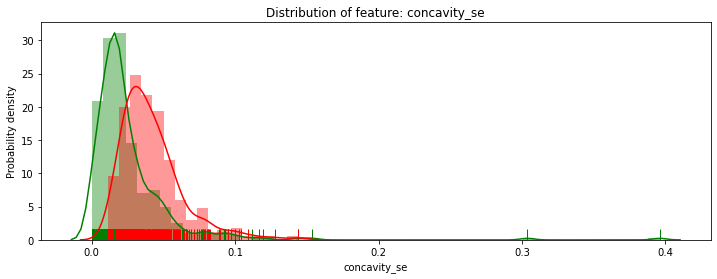

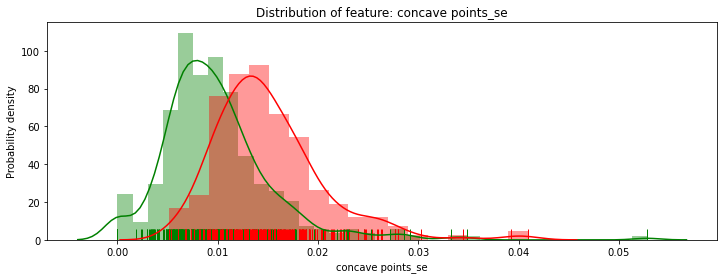

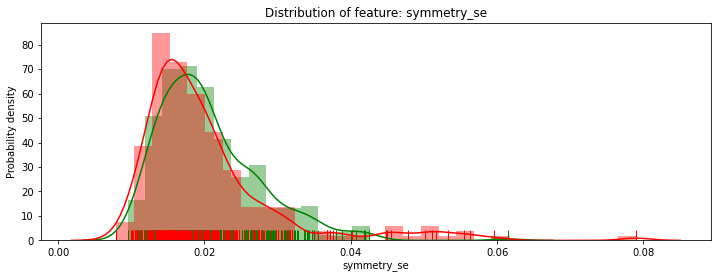

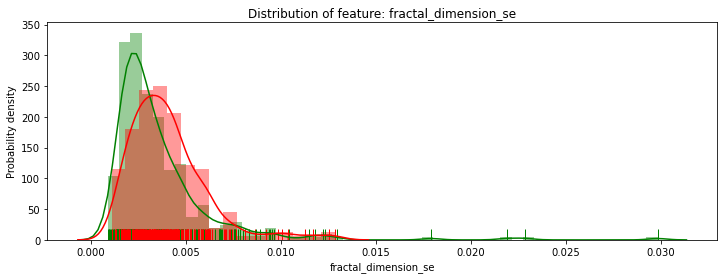

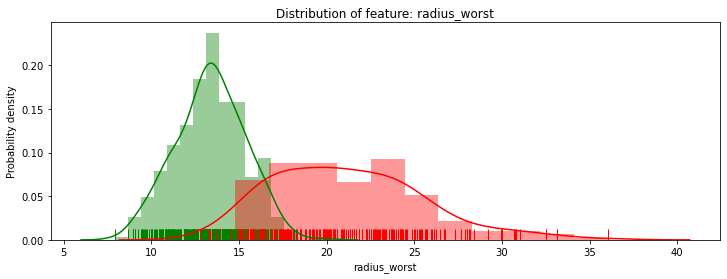

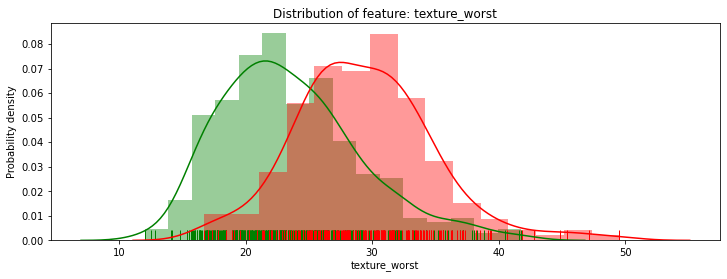

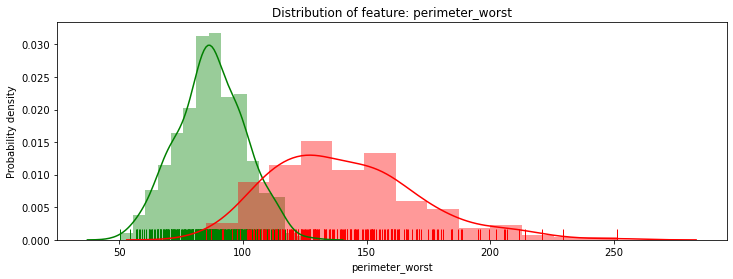

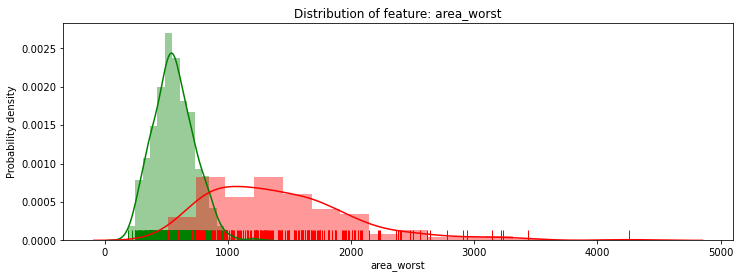

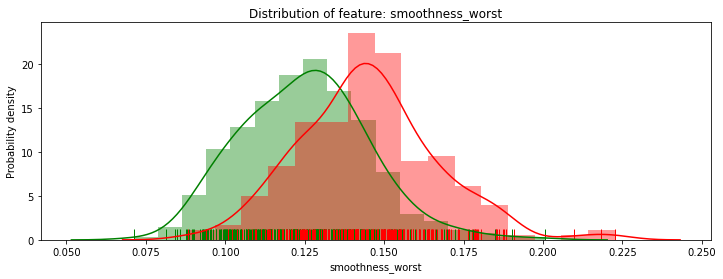

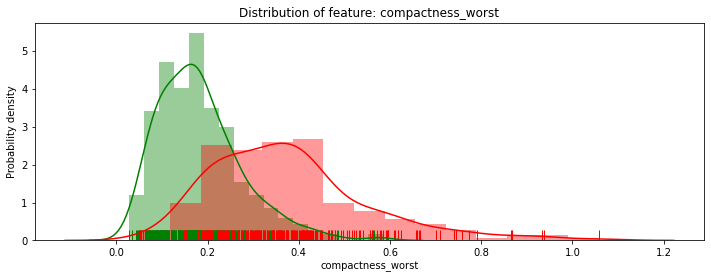

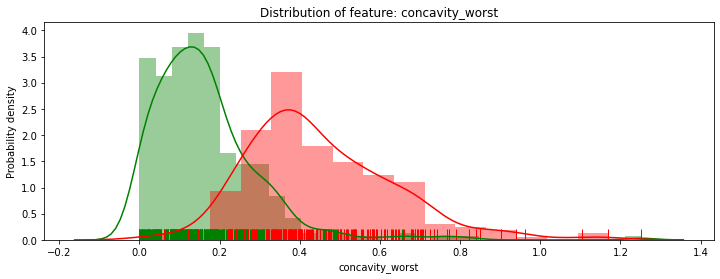

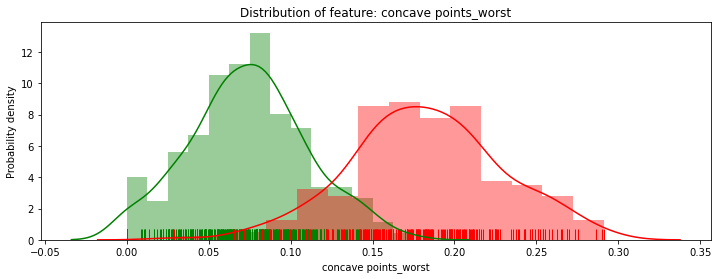

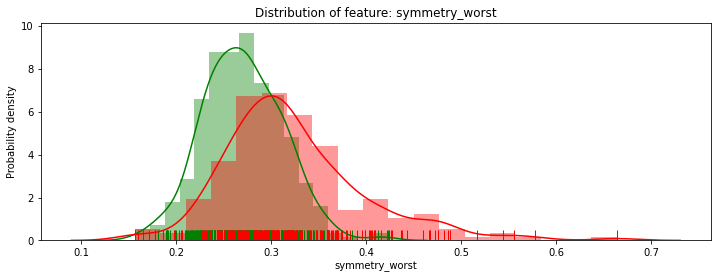

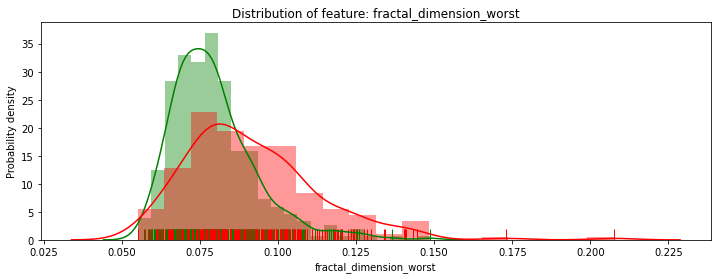

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

features = df.iloc[:,2:].columns
plt.suptitle('Title')
for i, f in enumerate(df[features]):
    plt.figure(figsize=(12, 4))
    ax = plt.subplot(1, 1, 1)
    sns.distplot(df[f][df.diagnosis == 'B'], rug=True, color='green')
    sns.distplot(df[f][df.diagnosis == 'M'], rug=True, color='red')
    ax.set_xlabel(str(f))
    ax.set_ylabel('Probability density')
    ax.set_title('Distribution of feature: ' + str(f))
plt.show()

Text(0.5, 1.0, 'Count of malignant (M) and benign (B) samples in the data set')

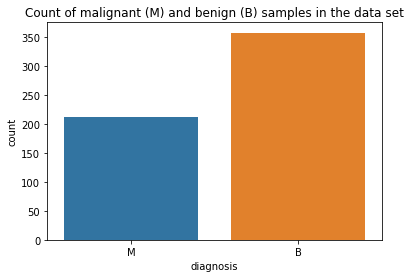

In [10]:
ax = sns.countplot(df['diagnosis'], label = "Occurrences")
plt.title("Count of malignant (M) and benign (B) samples in the data set")

In [11]:
X = df[features]
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [12]:
Y = df['diagnosis']

In [13]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7383)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

381
188
381
188


## Application of basic machine learning algorithms

In [15]:
scores = []
for i in range(2, 20):
    classifier = DecisionTreeClassifier(max_leaf_nodes=i, random_state=123)
    predictions = classifier.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_true = y_test, y_pred = predictions)
    scores.append(dict(score=score, classifier=classifier))
    print('With ' + str(i) + 'nodes is score: ' + str(score))

max_score = max(s['score'] for s in scores)
best_classifier = next(s for s in scores if s['score'] == max_score)['classifier']
print('Feature importances:')
imp_dict = zip (features, best_classifier.feature_importances_)
imp_dict = sorted(imp_dict, key = lambda t: t[1])
for f, i in imp_dict:
    print(f + ': ' + str(i))
print('Max score: ' + str(max_score))

With 2nodes is score: 0.9095744680851063
With 3nodes is score: 0.925531914893617
With 4nodes is score: 0.9414893617021277
With 5nodes is score: 0.9361702127659575
With 6nodes is score: 0.9361702127659575
With 7nodes is score: 0.9361702127659575
With 8nodes is score: 0.9361702127659575
With 9nodes is score: 0.9308510638297872
With 10nodes is score: 0.925531914893617
With 11nodes is score: 0.925531914893617
With 12nodes is score: 0.925531914893617
With 13nodes is score: 0.925531914893617
With 14nodes is score: 0.925531914893617
With 15nodes is score: 0.925531914893617
With 16nodes is score: 0.9202127659574468
With 17nodes is score: 0.9042553191489362
With 18nodes is score: 0.9042553191489362
With 19nodes is score: 0.9042553191489362
Feature importances:
radius_mean: 0.0
texture_mean: 0.0
perimeter_mean: 0.0
area_mean: 0.0
smoothness_mean: 0.0
compactness_mean: 0.0
concavity_mean: 0.0
concave points_mean: 0.0
symmetry_mean: 0.0
fractal_dimension_mean: 0.0
radius_se: 0.0
texture_se: 0.0
pe

In [16]:
scores = []
for i in range(2, 20):
    classifier = RandomForestClassifier(max_leaf_nodes=i)
    predictions = classifier.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_true = y_test, y_pred = predictions)
    scores.append(dict(score=score, classifier=classifier))
    print('With ' + str(i) + 'nodes is score: ' + str(score))

max_score = max(s['score'] for s in scores)
best_classifier = next(s for s in scores if s['score'] == max_score)['classifier']
print('Feature importances:')
imp_dict = zip (features, best_classifier.feature_importances_)
imp_dict = sorted(imp_dict, key = lambda t: t[1])
for f, i in imp_dict:
    print(f + ': ' + str(i))
print('Max score: ' + str(max_score))
rfc = best_classifier

With 2nodes is score: 0.9202127659574468
With 3nodes is score: 0.9414893617021277
With 4nodes is score: 0.9521276595744681
With 5nodes is score: 0.9414893617021277
With 6nodes is score: 0.9627659574468085
With 7nodes is score: 0.9574468085106383
With 8nodes is score: 0.9521276595744681
With 9nodes is score: 0.9574468085106383
With 10nodes is score: 0.9627659574468085
With 11nodes is score: 0.9627659574468085
With 12nodes is score: 0.9627659574468085
With 13nodes is score: 0.9680851063829787
With 14nodes is score: 0.9627659574468085
With 15nodes is score: 0.9680851063829787
With 16nodes is score: 0.9627659574468085
With 17nodes is score: 0.9680851063829787
With 18nodes is score: 0.9627659574468085
With 19nodes is score: 0.9627659574468085
Feature importances:
symmetry_se: 0.0029504800389258887
smoothness_mean: 0.0030968062684194617
compactness_se: 0.00328462254770653
fractal_dimension_worst: 0.003439161756059001
fractal_dimension_mean: 0.0038299257456068402
concavity_se: 0.0038422706962

In [17]:
classifier = GaussianNB()
predictions = classifier.fit(X_train, y_train).predict(X_test)
score = accuracy_score(y_true = y_test, y_pred = predictions)
print(str(score))
from sklearn.inspection import permutation_importance
imps = permutation_importance(classifier, X_test, y_test)
print(imps.importances_mean)

0.9468085106382979
[ 6.38297872e-03  1.06382979e-03  7.44680851e-03  1.06382979e-02
  0.00000000e+00 -2.22044605e-17 -3.19148936e-03  9.57446809e-03
  0.00000000e+00  0.00000000e+00  1.27659574e-02  0.00000000e+00
  1.17021277e-02  5.31914894e-02 -7.44680851e-03 -4.25531915e-03
 -1.06382979e-03 -1.06382979e-03  0.00000000e+00 -2.22044605e-17
  8.51063830e-03  1.06382979e-03  6.38297872e-03  2.76595745e-02
  0.00000000e+00 -4.25531915e-03 -3.19148936e-03  6.38297872e-03
  0.00000000e+00 -4.25531915e-03]


In [18]:
classifier = KNeighborsClassifier()
predictions = classifier.fit(X_train, y_train).predict(X_test)
score = accuracy_score(y_true = y_test, y_pred = predictions)
print(str(score))

0.9680851063829787


## Comparison of the accuracy the used basic algorithms with more sophisticated machine learning algorithms
### Basic algorithms examined in this project
* Decision Tree Classifier (DTC): 94.15%
* Random Forest Classifier (RFC): 96.81%
* Gaussian Naive Bayes (GNB): 94.68%
* k-Nearest Neighbors (KNN): 96,80%
### Advanced algorithms examined by others
* Artificial Neural Networks (ANN): 98.24% https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann 
* Gradient Boosting Machine (GBM): 97% https://www.kaggle.com/gpreda/breast-cancer-prediction-from-cytopathology-data
* Support Vector Machine (SVM): 98.25% https://www.kaggle.com/faressayah/support-vector-machine-pca-tutorial-for-beginner



<BarContainer object of 7 artists>

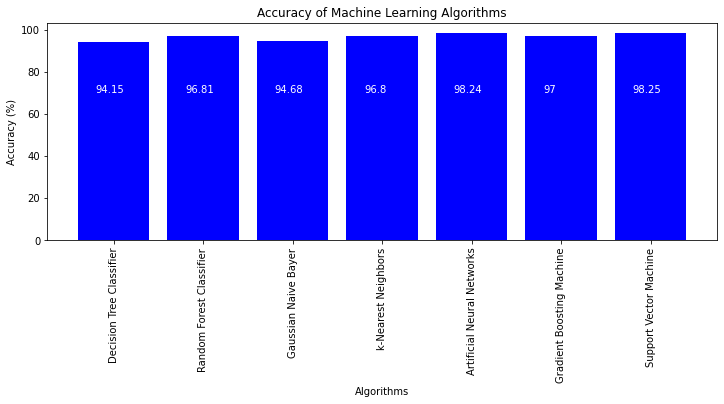

In [19]:
algorithm_accuracy = {
    'Decision Tree Classifier': 94.15,
    'Random Forest Classifier': 96.81,
    'Gaussian Naive Bayer': 94.68,
    'k-Nearest Neighbors': 96.80,
    'Artificial Neural Networks': 98.24,
    'Gradient Boosting Machine': 97,
    'Support Vector Machine': 98.25
}

plt.figure(figsize=(12, 4))

for index, value in enumerate(algorithm_accuracy.values()):
    plt.text(index - 0.2, 70, str(value), color='white')

plt.title('Accuracy of Machine Learning Algorithms')
plt.xticks(rotation=90)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.bar(algorithm_accuracy.keys(), algorithm_accuracy.values(), color='b')

## Most important features 
Looking at the distribution graphs, the following features appeared as the most important ones to me for the classification problem because they have the smallest overlapping areas for benign and malignant samples:
* cancavity_mean
* concave points_mean
* radius_worst
* perimeter_worst
* area_worst
* cancavity_worst
* concave points_worst

This is how the classifiers weighed the feature importance:
The Decision Tree Classifier found only three features being important for classification and ignored the other features:
* texture_worst: 0.06198140435134387
* concave points_worst: 0.12598114750037204
* area_worst: 0.8120374481482842 

The Random Forest Classifier weighed these features as most important:
* radius_mean: 0.05872515489464252
* area_mean: 0.06469903094642988
* perimeter_mean: 0.0665823176981204
* concave points_worst: 0.09296126521373517
* radius_worst: 0.11300785482788624
* perimeter_worst: 0.12171853874149956
* area_worst: 0.15396899594687236

The other two classification algorithms have no concept of feature importance 


<BarContainer object of 30 artists>

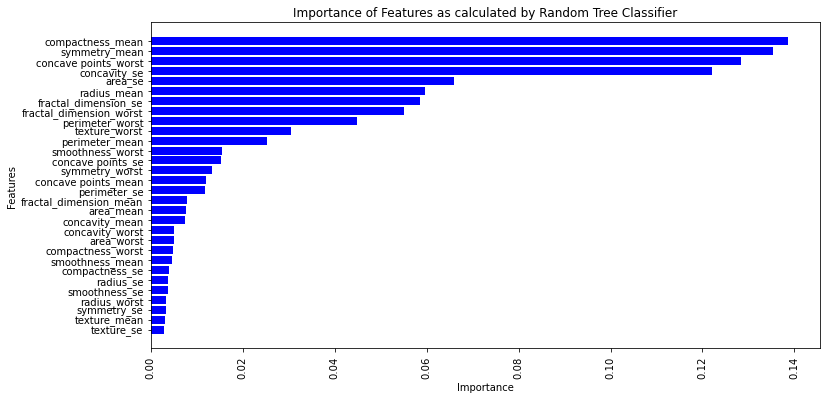

In [27]:
imp_dict = zip (features, rfc.feature_importances_)
imp_list = sorted(imp_dict, key = lambda t:(t[1], t[0]))
features = []
importances = []
for i in imp_list: 
   features += [i[0]]
   importances += [i[1]]
plt.figure(figsize=(12, 6))

# for index, value in enumerate(imp_dict_sorted.values()):
#     plt.text(index - 0.2, 70, str(value), color='white')

plt.title('Importance of Features as calculated by Random Tree Classifier')
plt.xticks(rotation=90)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.barh(features, importances, color='b')